SASTHA JEYASRI A
24BAD106
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
MSE: 211.25975374864066
RMSE: 14.534777389029413
R2 Score: 0.014492991917237963
                       Feature  Coefficient
0        

/tmp/ipython-input-901280659.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


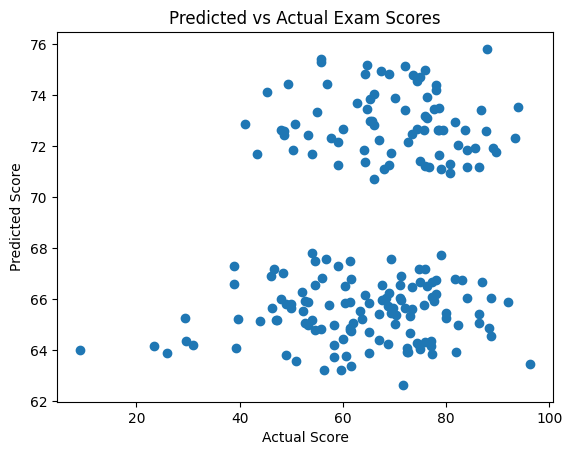

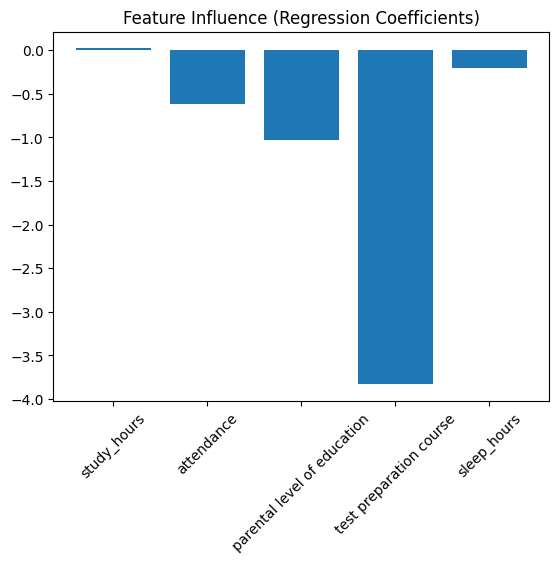

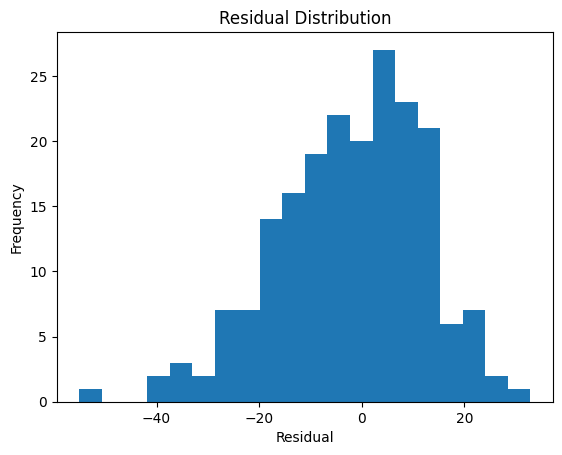

In [ ]:
#from google.colab import files
#uploaded=files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

print("SASTHA JEYASRI A\n24BAD106")

df = pd.read_csv("StudentsPerformance.csv")
print(df.head())

le_parent = LabelEncoder()
df['parental level of education'] = le_parent.fit_transform(df['parental level of education'])

le_test = LabelEncoder()
df['test preparation course'] = le_test.fit_transform(df['test preparation course'])

df['final_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

np.random.seed(42)
df['study_hours'] = np.random.randint(1, 8, size=len(df))
df['attendance'] = np.random.randint(60, 100, size=len(df))
df['sleep_hours'] = np.random.randint(4, 9, size=len(df))

X = df[['study_hours', 'attendance', 'parental level of education',
        'test preparation course', 'sleep_hours']]

y = df['final_score']


X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

coeff_df = pd.DataFrame({'Feature': X.columns,'Coefficient': model.coef_})

print(coeff_df)


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Ridge R2:", r2_score(y_test, ridge_pred))
print("Lasso R2:", r2_score(y_test, lasso_pred))
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

plt.figure()
plt.bar(coeff_df['Feature'], coeff_df['Coefficient'])
plt.xticks(rotation=45)
plt.title("Feature Influence (Regression Coefficients)")
plt.show()

residuals = y_test - y_pred

plt.figure()
plt.hist(residuals, bins=20)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()





SASTHA JEYASRI A
24BAD106

Degree 2 Polynomial Regression
MSE : 13.760855128148354
RMSE: 3.7095626599571485
R2  : 0.7440623896917424

Degree 3 Polynomial Regression
MSE : 13.813374257349997
RMSE: 3.7166348027953995
R2  : 0.7430855884466043

Degree 4 Polynomial Regression
MSE : 14.118024022829644
RMSE: 3.7573959097797567
R2  : 0.7374194192854787

Model Comparison:
    Degree        MSE      RMSE  R2 Score
0       2  13.760855  3.709563  0.744062
1       3  13.813374  3.716635  0.743086
2       4  14.118024  3.757396  0.737419

Ridge Regression (Degree 4) R2 Score: 0.7441024736636221


/tmp/ipython-input-2936456139.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn

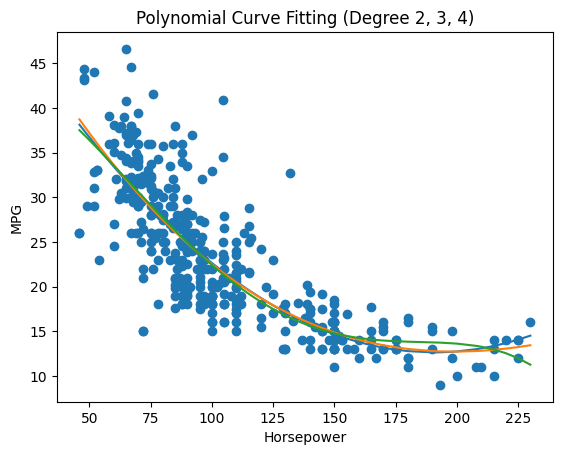

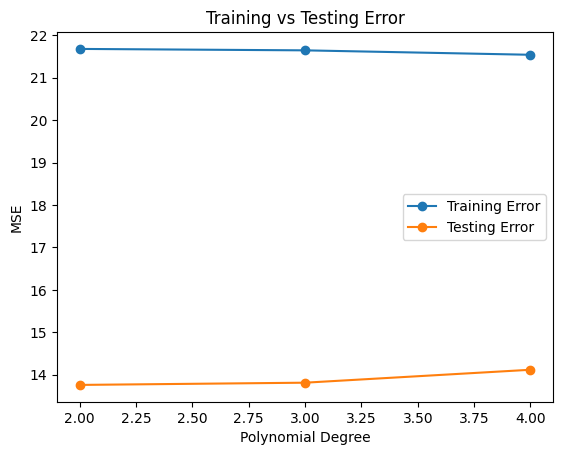

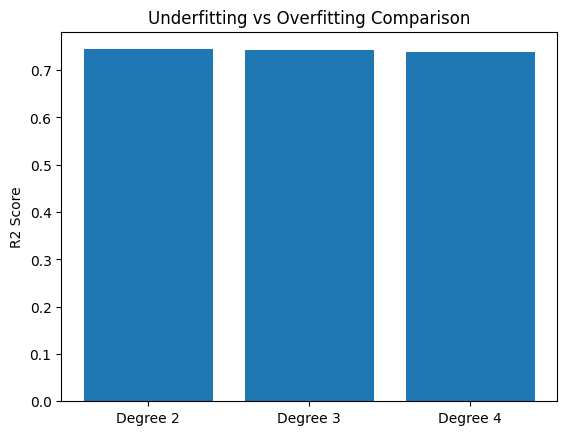

In [ ]:
#from google.colab import files
#uploaded=files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
print("SASTHA JEYASRI A\n24BAD106")

df = pd.read_csv("auto-mpg.csv")

df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'])

df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

X = df[['horsepower']]
y = df['mpg']

poly2 = PolynomialFeatures(degree=2, include_bias=False)
poly3 = PolynomialFeatures(degree=3, include_bias=False)
poly4 = PolynomialFeatures(degree=4, include_bias=False)

X_poly2 = poly2.fit_transform(X)
X_poly3 = poly3.fit_transform(X)
X_poly4 = poly4.fit_transform(X)


scaler2 = StandardScaler()
scaler3 = StandardScaler()
scaler4 = StandardScaler()

X_poly2 = scaler2.fit_transform(X_poly2)
X_poly3 = scaler3.fit_transform(X_poly3)
X_poly4 = scaler4.fit_transform(X_poly4)

X_train2, X_test2, y_train, y_test = train_test_split(X_poly2, y, test_size=0.2, random_state=42)
X_train3, X_test3, _, _ = train_test_split(X_poly3, y, test_size=0.2, random_state=42)
X_train4, X_test4, _, _ = train_test_split(X_poly4, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()

model2.fit(X_train2, y_train)
model3.fit(X_train3, y_train)
model4.fit(X_train4, y_train)

y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test3)
y_pred4 = model4.predict(X_test4)

def evaluate(y_test, y_pred, degree):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"\nDegree {degree} Polynomial Regression")
    print("MSE :", mse)
    print("RMSE:", rmse)
    print("R2  :", r2)
    return mse, rmse, r2

mse2, rmse2, r2_2 = evaluate(y_test, y_pred2, 2)
mse3, rmse3, r2_3 = evaluate(y_test, y_pred3, 3)
mse4, rmse4, r2_4 = evaluate(y_test, y_pred4, 4)

performance = pd.DataFrame({"Degree": [2, 3, 4],"MSE": [mse2, mse3, mse4],"RMSE": [rmse2, rmse3, rmse4],"R2 Score": [r2_2, r2_3, r2_4]})

print("\nModel Comparison:\n", performance)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train4, y_train)
ridge_pred = ridge.predict(X_test4)

print("\nRidge Regression (Degree 4) R2 Score:", r2_score(y_test, ridge_pred))

X_sorted = np.sort(X.values, axis=0)

X_poly2_plot = scaler2.transform(poly2.transform(X_sorted))
X_poly3_plot = scaler3.transform(poly3.transform(X_sorted))
X_poly4_plot = scaler4.transform(poly4.transform(X_sorted))

plt.figure()
plt.scatter(X, y)
plt.plot(X_sorted, model2.predict(X_poly2_plot))
plt.plot(X_sorted, model3.predict(X_poly3_plot))
plt.plot(X_sorted, model4.predict(X_poly4_plot))
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Curve Fitting (Degree 2, 3, 4)")
plt.show()

train_pred2 = model2.predict(X_train2)
train_pred3 = model3.predict(X_train3)
train_pred4 = model4.predict(X_train4)

train_mse = [
    mean_squared_error(y_train, train_pred2),
    mean_squared_error(y_train, train_pred3),
    mean_squared_error(y_train, train_pred4)
]

test_mse = [mse2, mse3, mse4]

plt.figure()
plt.plot([2, 3, 4], train_mse, marker='o', label="Training Error")
plt.plot([2, 3, 4], test_mse, marker='o', label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.legend()
plt.title("Training vs Testing Error")
plt.show()

plt.figure()
plt.bar(['Degree 2', 'Degree 3', 'Degree 4'], [r2_2, r2_3, r2_4])
plt.ylabel("R2 Score")
plt.title("Underfitting vs Overfitting Comparison")
plt.show()
